In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture

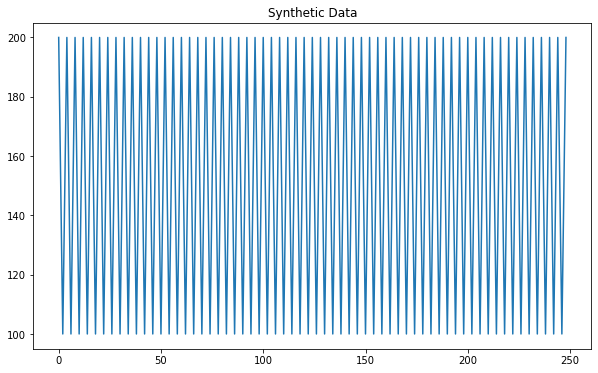

In [12]:
x = np.arange(0, 250,2)
y = np.zeros(125)
y += 100
for i in range (0, 125,2):
    y[i] = 200
sd = y
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title("Synthetic Data")
plt.show()

In [13]:
seasonal_data = pd.DataFrame(zip(x,y),columns=['Time','Value'])
seasonal_data

,Time,Value
0,0,200.0
1,2,100.0
2,4,200.0
3,6,100.0
4,8,200.0
...,...,...
120,240,200.0
121,242,100.0
122,244,200.0
123,246,100.0


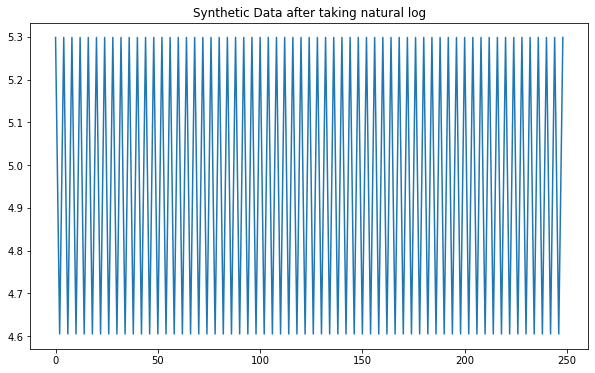

In [14]:
log_data = np.log(seasonal_data['Value'])
plt.figure(figsize=(10,6))
plt.plot(seasonal_data['Time'], log_data)
plt.title("Synthetic Data after taking natural log")
plt.show()

In [15]:
nlog_data = pd.DataFrame(zip(seasonal_data['Time'], log_data),columns=['Time','Log Value'])
nlog_data

,Time,Log Value
0,0,5.298317
1,2,4.605170
2,4,5.298317
3,6,4.605170
4,8,5.298317
...,...,...
120,240,5.298317
121,242,4.605170
122,244,5.298317
123,246,4.605170


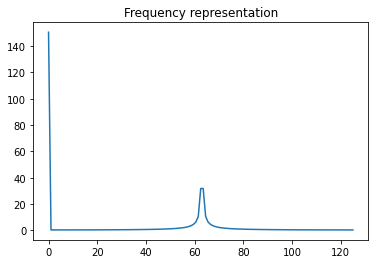

In [16]:
N = 250
sr = 1
y = np.array(seasonal_data['Value'])
f = fftpack.fftfreq(len(y))
yf = fftpack.fft(y)

T = 1.0 / N
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Frequency representation")
plt.show()

In [17]:
freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
freq_ampli

,Freq,Ampli
0,0.000,150.400000
1,0.008,0.400126
2,0.016,0.400506
3,0.024,0.401140
4,0.032,0.402030
...,...,...
120,0.040,0.403179
121,0.032,0.402030
122,0.024,0.401140
123,0.016,0.400506


In [18]:
freq_ampli = freq_ampli.iloc[1:,:]

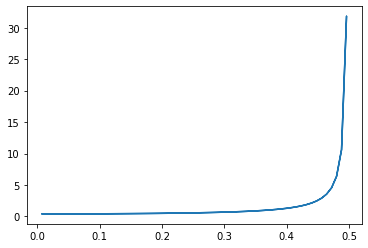

In [19]:
plt.plot(freq_ampli.Freq,freq_ampli.Ampli)

In [20]:
freq_ampli

,Freq,Ampli
1,0.008,0.400126
2,0.016,0.400506
3,0.024,0.401140
4,0.032,0.402030
5,0.040,0.403179
...,...,...
120,0.040,0.403179
121,0.032,0.402030
122,0.024,0.401140
123,0.016,0.400506


In [21]:
freq_ampli.Ampli.value_counts()

0.470038    2
0.426106    2
0.406271    2
0.513833    2
0.422343    2
           ..
0.485712    2
1.053244    2
0.718293    2
1.691339    2
0.434673    2
Name: Ampli, Length: 62, dtype: int64

In [22]:
frame_size = 50
Fs = 1
dt = 1/Fs
freq_vector = np.fft.rfftfreq(frame_size, d=dt)

In [23]:
yf1 = yf[yf != 0]
yf1

array([18800.-0.00000000e+00j,    50.+1.25690172e+00j,
          50.+2.51539296e+00j,    50.+3.77707131e+00j,
          50.+5.04355054e+00j,    50.+6.31646892e+00j,
          50.+7.59749780e+00j,    50.+8.88835055e+00j,
          50.+1.01907920e+01j,    50.+1.15066484e+01j,
          50.+1.28378180e+01j,    50.+1.41862830e+01j,
          50.+1.55541214e+01j,    50.+1.69435215e+01j,
          50.+1.83567963e+01j,    50.+1.97964004e+01j,
          50.+2.12649490e+01j,    50.+2.27652380e+01j,
          50.+2.43002676e+01j,    50.+2.58732688e+01j,
          50.+2.74877326e+01j,    50.+2.91474448e+01j,
          50.+3.08565238e+01j,    50.+3.26194659e+01j,
          50.+3.44411958e+01j,    50.+3.63271264e+01j,
          50.+3.82832273e+01j,    50.+4.03161052e+01j,
          50.+4.24330984e+01j,    50.+4.46423871e+01j,
          50.+4.69531253e+01j,    50.+4.93755965e+01j,
          50.+5.19214007e+01j,    50.+5.46036790e+01j,
          50.+5.74373853e+01j,    50.+6.04396175e+01j,
          

In [24]:
quefrency = np.fft.rfftfreq(np.log(yf1).size,freq_vector[1] - freq_vector[0])
cepstrum = np.fft.rfft(np.log(np.abs(yf1)))

In [25]:
quefrency

array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
        4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
        8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
       13.2, 13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. , 16.4, 16.8, 17.2,
       17.6, 18. , 18.4, 18.8, 19.2, 19.6, 20. , 20.4, 20.8, 21.2, 21.6,
       22. , 22.4, 22.8, 23.2, 23.6, 24. , 24.4, 24.8])

In [26]:
cepstrum

array([ 5.80882715e+02+0.00000000e+00j, -5.58772060e+01-1.94289029e-15j,
        3.64862111e+01+1.72084569e-15j, -1.42100774e+01+7.79616164e-16j,
        2.08605178e+01-2.66787473e-15j, -5.87581872e+00+1.09985567e-14j,
        1.56510263e+01+9.51542602e-16j, -2.30299828e+00-1.16136222e-15j,
        1.30452329e+01+2.57432242e-15j, -3.17008260e-01-3.43699598e-15j,
        1.14806320e+01+6.62701804e-15j,  9.47958451e-01-7.28142068e-16j,
        1.04363833e+01+2.96453316e-16j,  1.82491010e+00+1.01599873e-17j,
        9.68926378e+00-1.04654631e-15j,  2.46925646e+00+9.76857796e-16j,
        9.12765570e+00-1.56348280e-15j,  2.96327963e+00-3.76414555e-15j,
        8.68954276e+00-1.82817509e-15j,  3.35462333e+00-6.89389793e-15j,
        8.33770829e+00+8.14940307e-15j,  3.67278834e+00-8.52175355e-15j,
        8.04846166e+00+5.20498983e-16j,  3.93702180e+00-4.39083772e-16j,
        7.80600145e+00-2.09051357e-15j,  4.16041961e+00-5.16239515e-15j,
        7.59938015e+00-3.37655064e-15j,  4.35220575

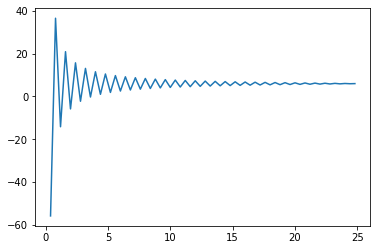

In [27]:
cep = pd.DataFrame(zip(quefrency,cepstrum.real),columns=['Quefrency','Cepstrum'])
cep = cep.iloc[1:,:]
plt.plot(cep.Quefrency,cep.Cepstrum)

In [28]:
dfx = np.array(seasonal_data['Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm0 = gmm

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site

In [29]:
dfx = np.array(nlog_data['Log Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm1 = gmm

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\Yash\Anaconda3\lib\site

In [48]:
dfx = freq_ampli
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm2 = gmm

In [31]:
dfx = cep
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm3 = gmm

In [32]:
best_gmm0

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

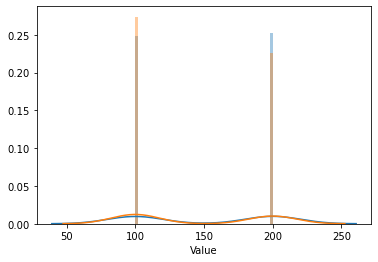

In [33]:
sns.distplot(seasonal_data['Value'],bins=50)
z,_ = best_gmm0.sample(250)
sns.distplot(z,bins=50)

In [34]:
print(best_gmm0.score(np.array(seasonal_data['Value']).reshape(-1,1)))
print(best_gmm0.score(z))

5.295701565558862
4.819618693333382


In [49]:
best_gmm2

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [50]:
best_gmm2.weights_

array([0.39996238, 0.01612903, 0.01612903, 0.22836144, 0.01612903,
       0.32328908])

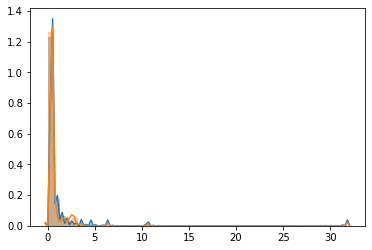

In [51]:
freq1 = freq_ampli
y,_ = best_gmm2.sample(125)
sns.distplot(freq1)
sns.distplot(y)

In [52]:
print(best_gmm2.score(freq1))
print(best_gmm2.score(y))

2.8370890235154813
2.808863089031804


In [53]:
freq1.describe()

,Freq,Ampli
count,124.000000,124.000000
mean,0.252000,1.624325
std,0.143745,4.202859
min,0.008000,0.400126
25%,0.128000,0.434673
50%,0.252000,0.569411
75%,0.376000,1.053244
max,0.496000,31.831826


In [54]:
best_gmm2.means_

array([[ 0.10326611,  0.4307166 ],
       [ 0.496     , 31.83182639],
       [ 0.48      ,  6.37038844],
       [ 0.41929603,  1.97197217],
       [ 0.488     , 10.61284323],
       [ 0.28251338,  0.66315989]])

In [42]:
best_gmm3

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

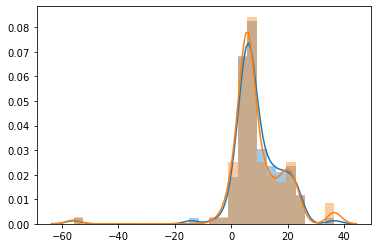

In [43]:
cep1 = cep
a,_ = best_gmm3.sample(52)
sns.distplot(cep1)
sns.distplot(a)

In [44]:
print(best_gmm3.score(cep1))
print(best_gmm3.score(a))

-4.5145517085116
-3.770220907794508


In [45]:
best_gmm1

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

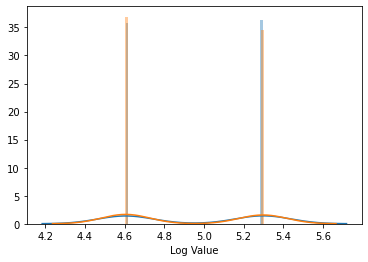

In [46]:
sns.distplot(nlog_data['Log Value'],bins=50)
z2,_ = best_gmm1.sample(250)
sns.distplot(z2,bins=50)

In [47]:
print(best_gmm1.score(np.array(nlog_data['Log Value']).reshape(-1,1)))
print(best_gmm1.score(z2))

5.295701563739873
4.73471733818726
